In [ ]:
#Import general
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import math

#import for linear regression
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

#imoprt for clustering
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

# Data Preperation
  
Please note that the following section was done locally and as a result may not run properly in colab due to file uploading. Fortunately, if you download this notebook locally with the data, it should all run.  
  
All the data was manually scraped from websites documented in the report. There was no large dataset that was directly downloaded.

## Getting Data

In [ ]:
#Create the stats dataset by concatinating all draft year data
#This will not run in colab however runs locally if this folder is downloaded.

draft = {}
for i in range (6,22):
    if (i<10):
        year = ("200"+str(i))
    else:
        year = ("20"+str(i))

    draft[i]=(pd.read_csv(year+'_draft.csv', header=1))
    draft[i]['Year'] = int(year)

draft_df = pd.concat(draft)
draft_df.to_csv('game_stats.csv')

FileNotFoundError: ignored

In [ ]:
agility_stats = pd.read_csv('https://raw.githubusercontent.com/ZhiChua/NBA-prospect-prediction/main/agility_stats.csv')
anthro_stats = pd.read_csv('https://raw.githubusercontent.com/ZhiChua/NBA-prospect-prediction/main/anthro_stats.csv')
eff_stats = pd.read_csv('https://raw.githubusercontent.com/ZhiChua/NBA-prospect-prediction/main/eff_stats.csv')
game_stats = pd.read_csv('https://raw.githubusercontent.com/ZhiChua/NBA-prospect-prediction/main/game_stats.csv')

In [ ]:
data = [agility_stats, anthro_stats, eff_stats, game_stats]
names = ['agility_stats', 'anthro_stats', 'eff_stats', 'game_stats']

## Initial exploration

In [ ]:
#Check head for each dataset
for i in range(0,4):
  print (names[i])
  print (data[i].head())
  print ('='*100)
  print ('')

agility_stats
              PLAYER    POS LANE_AGILITY_TIME SHUTTLE_RUN  \
0      Kenny Adeleke   PF-C             11.57           -   
1       Maurice Ager  SG-PG             11.73           -   
2  LaMarcus Aldridge   PF-C             12.02           -   
3      Morris Almond  SG-SF             11.45           -   
4       Lou Amundson     PF             10.58           -   

  THREE_QUARTER_SPRINT STANDING_VERTICAL_LEAP MAX_VERTICAL_LEAP  \
0                 3.47                  28.50             30.50   
1                 3.22                  29.50             35.00   
2                 3.43                  26.50             34.00   
3                 3.19                  31.00             35.50   
4                 3.20                  32.00             35.50   

  MAX_BENCH_PRESS  YEAR  
0           26.00  2006  
1           11.00  2006  
2            8.00  2006  
3           13.00  2006  
4           14.00  2006  

anthro_stats
           PLAYER POS BODY_FAT HAND_LENGTH_INC

In [ ]:
#check the columns of each dataset
for i in range(0,4):
  print (names[i])
  print (data[i].columns)
  print ('='*100)
  print ('')

agility_stats
Index(['PLAYER', 'POS', 'LANE_AGILITY_TIME', 'SHUTTLE_RUN',
       'THREE_QUARTER_SPRINT', 'STANDING_VERTICAL_LEAP', 'MAX_VERTICAL_LEAP',
       'MAX_BENCH_PRESS', 'YEAR'],
      dtype='object')

anthro_stats
Index(['PLAYER', 'POS', 'BODY_FAT', 'HAND_LENGTH_INCHES', 'HAND_WIDTH_INCHES',
       'HEIGHT_WO_SHOES', 'HEIGHT_W_SHOES', 'STANDING_REACH', 'WEIGHT',
       'WINGSPAN', 'YEAR'],
      dtype='object')

eff_stats
Index(['#', 'PLAYER', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'EFF', 'YEAR'],
      dtype='object')

game_stats
Index(['Column1', '_1', 'Rk', 'Pk', 'Tm', 'PLAYER', 'College', 'Yrs', 'G',
       'MP', 'PTS', 'TRB', 'AST', 'FG%', '3P%', 'FT%', 'MP.1', 'PTS.1',
       'TRB.1', 'AST.1', 'WS', 'WS/48', 'BPM', 'VORP', 'Year'],
      dtype='object')



In [ ]:
#Check the info for each dataset
for i in range(0,4):
  print (names[i])
  print (data[i].info)
  print ('='*100)
  print ('')

agility_stats
<bound method DataFrame.info of                   PLAYER    POS LANE_AGILITY_TIME SHUTTLE_RUN  \
0          Kenny Adeleke   PF-C             11.57           -   
1           Maurice Ager  SG-PG             11.73           -   
2      LaMarcus Aldridge   PF-C             12.02           -   
3          Morris Almond  SG-SF             11.45           -   
4           Lou Amundson     PF             10.58           -   
...                  ...    ...               ...         ...   
999        Aaron Wiggins  SG-SF             11.20        3.00   
1000     Ziaire Williams     SF             10.69        3.04   
1001        Moses Wright     PF             11.20        3.42   
1002  McKinley Wright IV     PG             10.76        3.12   
1003   Marcus Zegarowski     PG             11.47        3.26   

     THREE_QUARTER_SPRINT STANDING_VERTICAL_LEAP MAX_VERTICAL_LEAP  \
0                    3.47                  28.50             30.50   
1                    3.22        

In [ ]:
#Describe each column for all datasets
for i in range(0,4):
  print (names[i])
  print (data[i].describe)
  print ('='*100)
  print ('')

agility_stats
<bound method NDFrame.describe of                   PLAYER    POS LANE_AGILITY_TIME SHUTTLE_RUN  \
0          Kenny Adeleke   PF-C             11.57           -   
1           Maurice Ager  SG-PG             11.73           -   
2      LaMarcus Aldridge   PF-C             12.02           -   
3          Morris Almond  SG-SF             11.45           -   
4           Lou Amundson     PF             10.58           -   
...                  ...    ...               ...         ...   
999        Aaron Wiggins  SG-SF             11.20        3.00   
1000     Ziaire Williams     SF             10.69        3.04   
1001        Moses Wright     PF             11.20        3.42   
1002  McKinley Wright IV     PG             10.76        3.12   
1003   Marcus Zegarowski     PG             11.47        3.26   

     THREE_QUARTER_SPRINT STANDING_VERTICAL_LEAP MAX_VERTICAL_LEAP  \
0                    3.47                  28.50             30.50   
1                    3.22      

## Initial Data Cleaning


As seen from the vast number of columns above, lets remove uncessary columns that provide no value for example:

- Column1 - all the number 6
- _1 - index of players that does not provide value
- Tm - College team
- MP - Total minutes played (we will use MP/ game)

In [ ]:
#Initialize all datasets
game_stats = game_stats.drop(columns=['Column1', '_1', 'Rk', 'Pk', 'Tm', 'College', 'Yrs', 'G', 'MP', 'PTS', 'TRB', 'AST'], axis = 1)
eff_stats = eff_stats[['#','PLAYER','EFF']]
agility_stats = agility_stats.drop(columns=['POS', 'YEAR'], axis = 1)
anthro_stats = anthro_stats.drop(columns=['POS','YEAR'], axis = 1)

In [ ]:
#reset data list with changes
data = [agility_stats, anthro_stats, eff_stats, game_stats]

Let's take a look at the current available columns and how much data they hold

In [ ]:
for i in range(0,4):
  print (names[i])
  print (data[i].info())
  print ('='*100)
  print ('')

agility_stats
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   PLAYER                  1004 non-null   object
 1   LANE_AGILITY_TIME       1004 non-null   object
 2   SHUTTLE_RUN             1004 non-null   object
 3   THREE_QUARTER_SPRINT    1004 non-null   object
 4   STANDING_VERTICAL_LEAP  1004 non-null   object
 5   MAX_VERTICAL_LEAP       1004 non-null   object
 6   MAX_BENCH_PRESS         1004 non-null   object
dtypes: object(7)
memory usage: 55.0+ KB
None

anthro_stats
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PLAYER              1004 non-null   object
 1   BODY_FAT            1004 non-null   object
 2   HAND_LENGTH_INCHES  1004 non-null   object
 3   H

## Combining Data


In [ ]:
#merge all datasets on name columns
#left joins are made as players without efficiency cannot be used as training data
df_all = eff_stats.merge(game_stats, how='left', on='PLAYER').merge(agility_stats, how='left', on='PLAYER').merge(anthro_stats, how='left', on='PLAYER').merge(agility_stats, how='left', on='PLAYER')

In [ ]:
df_all.shape

(895, 35)

Data left join on eff_stats as that contains the variable we are predicting. There are 895 rows however many of them are missing data.

In [ ]:
df_all['PLAYER'].unique().size

754

Looks like we have a few duplicate players, lets save the first appearance of each player so that the data is not over represented and the model is not skewed.

In [ ]:
df_all = df_all.drop_duplicates('PLAYER')
df_all = df_all.drop(columns=['#'])

In [ ]:
df_all.describe()

EFF         FG%         3P%         FT%        MP.1       PTS.1  \
count  754.000000  524.000000  508.000000  524.000000  524.000000  524.000000   
mean     7.199867    0.448756    0.304380    0.736817   20.443130    8.591412   
std      4.048345    0.062112    0.092633    0.092023    7.599485    5.010633   
min      0.200000    0.267000    0.000000    0.390000    3.200000    0.900000   
25%      4.225000    0.411000    0.286000    0.682000   14.600000    4.800000   
50%      6.300000    0.440000    0.330000    0.750000   20.300000    7.400000   
75%      9.400000    0.475250    0.360000    0.805000   26.725000   11.325000   
max     25.600000    0.720000    0.667000    0.915000   36.700000   27.100000   

            TRB.1       AST.1          WS       WS/48        BPM        VORP  \
count  524.000000  524.000000  524.000000  524.000000  524.00000  524.000000   
mean     3.619656    1.845420   15.496565    0.075303   -1.51355    3.834733   
std      2.012432    1.564496   22.132155    0.053959    2.43050    9.108745   
min      0.300000    0.100000   -1.800000   -0.203000  -10.30000   -3.900000   
25%      2.200000    0.800000    1.200000    0.041750   -3.10000   -0.400000   
50%      3.150000    1.300000    6.350000    0.075500   -1.60000    0.300000   
75%      4.500000    2.400000   21.925000    0.108250    0.00000    4.400000   
max     13.300000    9.100000  152.200000    0.227000    6.80000   74.800000   

              Year  
count   524.000000  
mean   2013.578244  
std       4.840040  
min    2006.000000  
25%    2009.000000  
50%    2013.000000  
75%    2018.000000  
max    2021.000000

### Interesting things to note:

The following are medians the median statistics. Keep in mind these are higher than the average college player as all of thesee players were selected to play in the NBA

EFF	FG%	3P%	FT%	MP.1	PTS.1	TRB.1	AST.1	WS	WS/48	BPM	VORP	Year
6.300000	0.440000	0.330000	0.750000	20.300000	7.400000	3.150000	1.300000	6.350000	0.075500	-1.60000	0.300000

## Manual Data Cleaning
Some data was retrieved to populate some columns and filled in missing data for player who are missing college stats but not anthro stats as additional anthro stats were not able to be found.
Many players played in the NBA and NCAA but were not drafted immediately and as a result did not appear in our original data search. These players were manually tracked down and updated.

## Fixing Data Types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PLAYER                    256 non-null    object 
 1   EFF                       256 non-null    float64
 2   FG%                       256 non-null    float64
 3   3P%                       256 non-null    float64
 4   FT%                       256 non-null    float64
 5   MP.1                      256 non-null    float64
 6   PTS.1                     256 non-null    float64
 7   TRB.1                     256 non-null    float64
 8   AST.1                     256 non-null    float64
 9   WS                        256 non-null    float64
 10  WS/48                     256 non-null    float64
 11  BPM                       256 non-null    float64
 12  VORP                      256 non-null    float64
 13  Year                      256 non-null    int64  
 14  LANE_AGILI

Regex - Convert length measurements to int (cm)

Looking at length measurements, all the attributes are in feet and inches for example: 7'2.75'' or 6'10.25''   
Unfortunately, the decimals are inconsistent so we will need to parse out the values and convert them into cm following the format of   
Value ' value ''    
where the first value is multiplied by 30 and the second value is multiplied by 2.54 (cm/inch)

In [ ]:
#Example 
measurement = "7'2.75''"
splt = measurement.split("'")
cm = float(splt[0])*30+float(splt[1])*2.54
print(f'cm is {cm}'+str(type(cm)))

#NICE it works

cm is 216.985<class 'float'>


In [ ]:
def to_cm(measurement):
    #Check to see if it is NaN
    if measurement == measurement: 
        splt = str(measurement).split("'")
        print(splt)
        cm = float(splt[0])*30+float(splt[1])*2.54
        return cm
    else:
        pass

In [ ]:
df['testHEIGHT_WO_SHOES'] = df['HEIGHT_WO_SHOES'].apply(to_cm)
df['testHEIGHT_W_SHOES'] = df['HEIGHT_W_SHOES'].apply(to_cm)
df['testSTANDING_REACH'] = df['STANDING_REACH'].apply(to_cm)
df['testWINGSPAN'] = df['WINGSPAN'].apply(to_cm)

Delete all appearances of "-" and convert all columns to numeric floats

In [ ]:
#All these columns are of type object
columns = ['LANE_AGILITY_TIME_x','SHUTTLE_RUN_x','THREE_QUARTER_SPRINT_x', 'STANDING_VERTICAL_LEAP_x',
	'MAX_VERTICAL_LEAP_x','MAX_BENCH_PRESS_x','BODY_FAT','HAND_LENGTH_INCHES','HAND_WIDTH_INCHES',
    'HEIGHT_WO_SHOES','HEIGHT_W_SHOES','STANDING_REACH','WEIGHT','WINGSPAN','LANE_AGILITY_TIME_y',
    'SHUTTLE_RUN_y','THREE_QUARTER_SPRINT_y','STANDING_VERTICAL_LEAP_y','MAX_VERTICAL_LEAP_y','MAX_BENCH_PRESS_y']

In [ ]:
df["BODY_FAT"] = [str(x).replace('-%', '') for x in df['BODY_FAT']]
df["BODY_FAT"]= pd.to_numeric(df["BODY_FAT"],errors='coerce')
# type(df["BODY_FAT"][2])
for column in columns:
    df[column] = [str(x).replace('-', '') for x in df[column]]
    df[column]= pd.to_numeric(df[column],errors='coerce')

df.head()

PLAYER  EFF    FG%       3P%    FT%  MP.1  PTS.1  TRB.1  AST.1  \
0   Thomas Robinson  6.3  0.470  0.317657  0.505  13.4    4.9    4.8    0.6   
1        Aaron Gray  5.0  0.509  0.317657  0.562  12.1    3.4    3.7    0.7   
2      Jeremy Tyler  5.2  0.450  0.317657  0.557   9.9    3.6    2.6    0.2   
3  Derrick Caracter  2.1  0.485  0.317657  0.739   5.2    2.0    1.0    0.2   
4    JaJuan Johnson  3.1  0.446  0.317657  0.667   8.3    3.2    1.6    0.2   

    WS  ...  HEIGHT_WO_SHOES  HEIGHT_W_SHOES  STANDING_REACH  WEIGHT  \
0  4.6  ...           199.69          202.23          265.40   244.2   
1  6.2  ...           210.00          214.45          271.27   271.0   
2  0.3  ...           202.86          206.67          276.35   262.4   
3  0.3  ...           200.96          204.13          269.21   280.0   
4  0.2  ...           202.86          205.40          269.21   219.8   

   WINGSPAN  LANE_AGILITY_TIME_y  THREE_QUARTER_SPRINT_y  \
0    218.26                11.96                    3.17   
1    218.26                12.07                    3.70   
2    222.70                11.26                    3.29   
3    210.64                12.78                    3.61   
4    215.08                11.21                    3.14   

   STANDING_VERTICAL_LEAP_y  MAX_VERTICAL_LEAP_y  MAX_BENCH_PRESS_y  
0                      28.5                 35.5                 15  
1                      27.0                 32.5                 17  
2                      28.0                 33.5                 10  
3                      25.0                 30.5                 22  
4                      33.5                 38.0                 15  

[5 rows x 30 columns]

## More Manual Data Cleaning
  
Rows were dropped manually on excel using the procedure docuemented in the report.  
The value for players with stats with 0% were changed to NAN as it is unlikely that a player never shot a single three pointer.

# Feature Engineering

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ZhiChua/NBA-prospect-prediction/main/final_data.csv')
dfCleaning = pd.read_csv('https://raw.githubusercontent.com/ZhiChua/NBA-prospect-prediction/main/data_all_cleaning.csv')

NameError: ignored

## Imputation
We made sure we populated all the values in the excel to achieve the optimal model performance. This was the number of null values in the csv for each column. 

In [ ]:
print(dfCleaning.isnull().sum())

## Replacing empty values
  
All empty values were replaced with the mean. We had already dropped the rows we did not want.

In [ ]:
df=df.fillna(df.mean())
# Final data set after dropping columns or replacing it with the mean
print(df.isnull().sum())

PLAYER                      0
EFF                         0
FG%                         0
3P%                         0
FT%                         0
MP.1                        0
PTS.1                       0
TRB.1                       0
AST.1                       0
WS                          0
WS/48                       0
BPM                         0
VORP                        0
Year                        0
LANE_AGILITY_TIME_x         0
THREE_QUARTER_SPRINT_x      0
STANDING_VERTICAL_LEAP_x    0
MAX_VERTICAL_LEAP_x         0
MAX_BENCH_PRESS_x           0
BODY_FAT                    0
HEIGHT_WO_SHOES             0
HEIGHT_W_SHOES              0
STANDING_REACH              0
WEIGHT                      0
WINGSPAN                    0
LANE_AGILITY_TIME_y         0
THREE_QUARTER_SPRINT_y      0
STANDING_VERTICAL_LEAP_y    0
MAX_VERTICAL_LEAP_y         0
MAX_BENCH_PRESS_y           0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


## Heatmap of the coefficients

In [ ]:
plt.figure(figsize=(18,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

NameError: ignored

## Univariate and Linear Fit

In [ ]:
columns = ['FG%','3P%','FT%','MP.1','PTS.1','TRB.1','AST.1','WS','WS/48','BPM','VORP','Year','LANE_AGILITY_TIME_x','THREE_QUARTER_SPRINT_x','STANDING_VERTICAL_LEAP_x','MAX_VERTICAL_LEAP_x','MAX_BENCH_PRESS_x','BODY_FAT','HEIGHT_WO_SHOES','HEIGHT_W_SHOES','STANDING_REACH','WEIGHT','WINGSPAN','LANE_AGILITY_TIME_y','THREE_QUARTER_SPRINT_y','STANDING_VERTICAL_LEAP_y','MAX_VERTICAL_LEAP_y','MAX_BENCH_PRESS_y']

## Linear Fit
The field goal percentage and minutes played are both important; regular field goals are baskets made when a shooter is below the three-point arc. In general, minutes played is a more important factor to consider because it is a reflection of how helpful they are to the team. Some players are inefficient or have a lower FG% just because their role is a scorer or an assister.

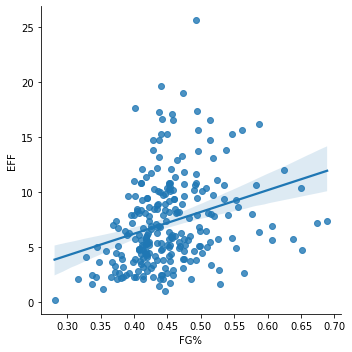

In [ ]:
sns.lmplot(x='FG%', y="EFF", data=df, fit_reg=True)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

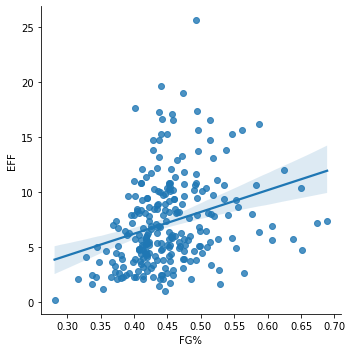

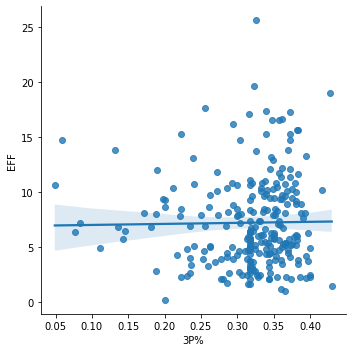

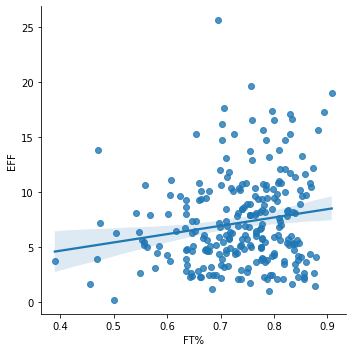

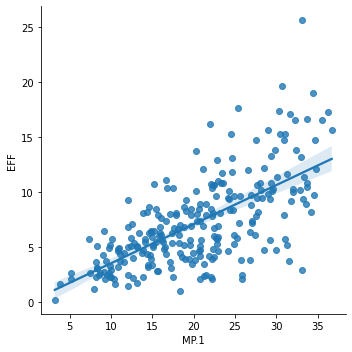

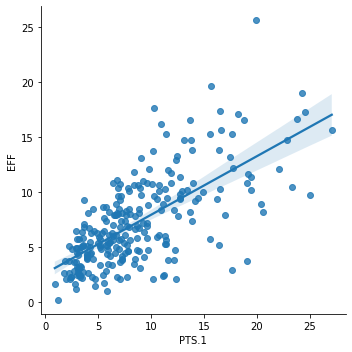

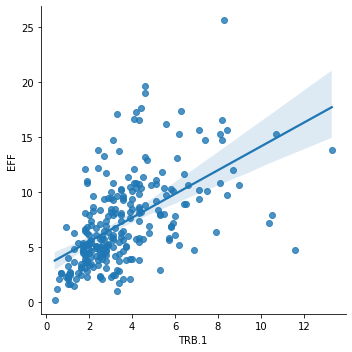

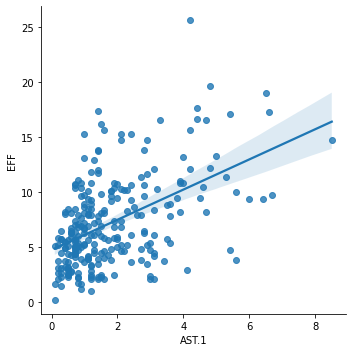

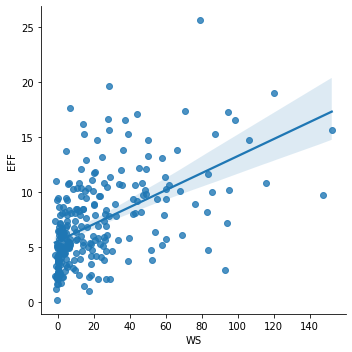

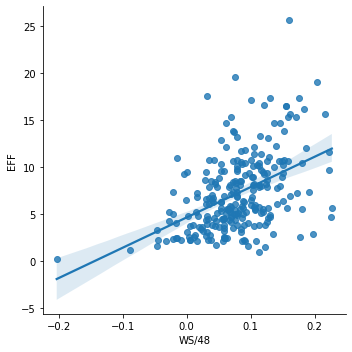

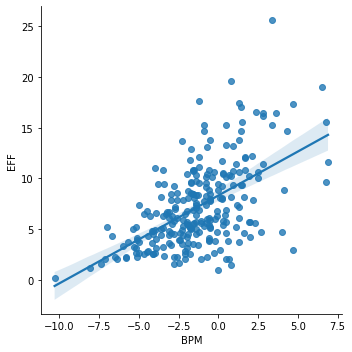

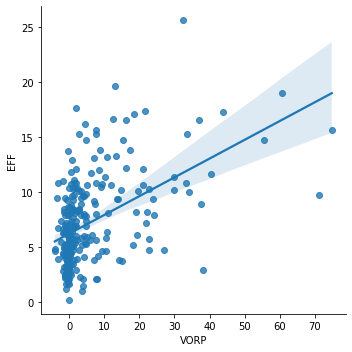

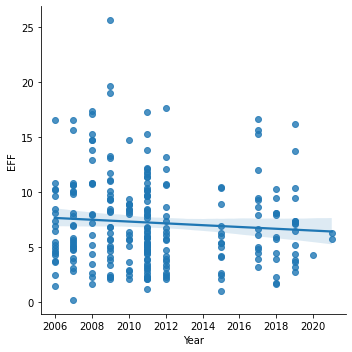

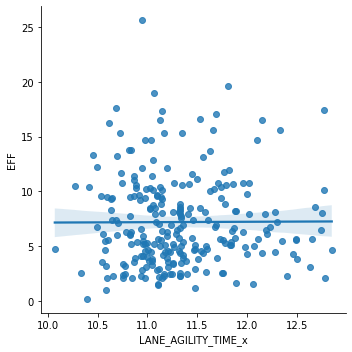

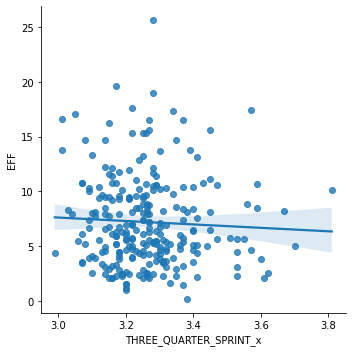

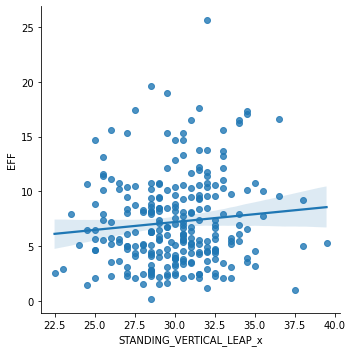

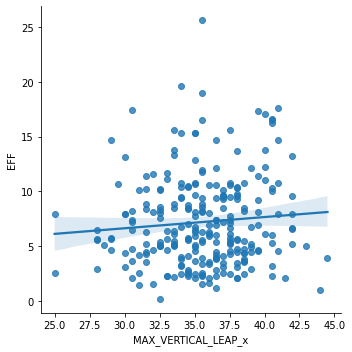

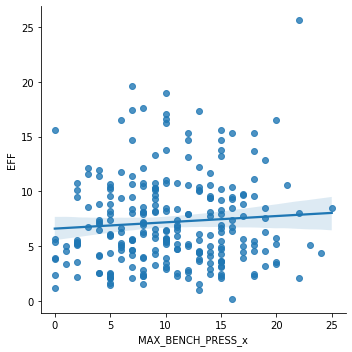

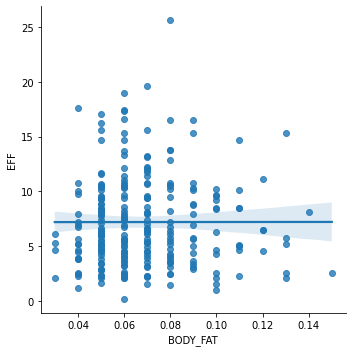

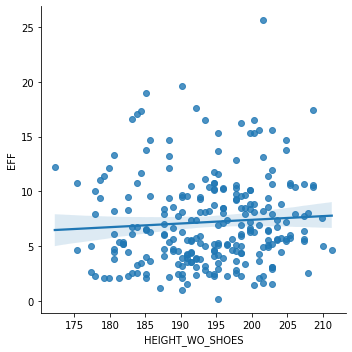

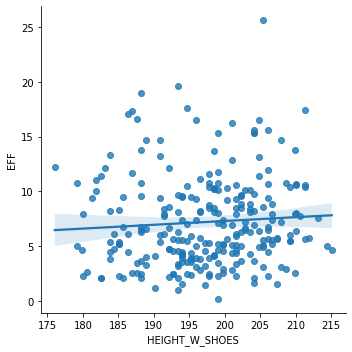

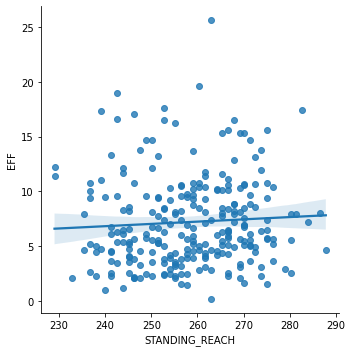

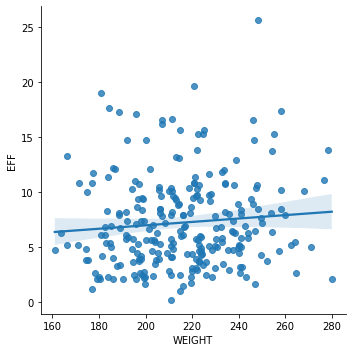

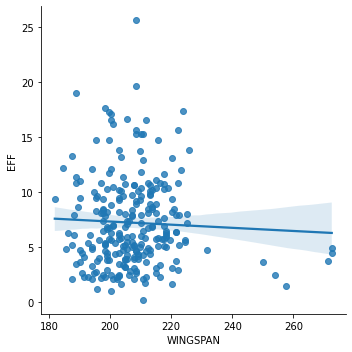

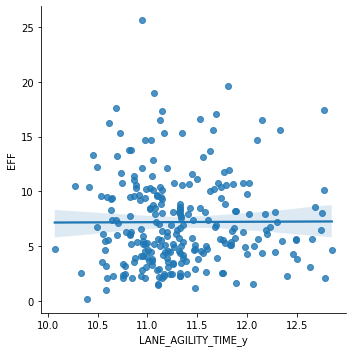

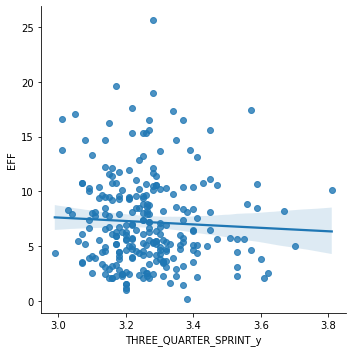

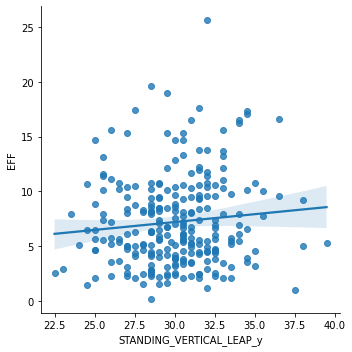

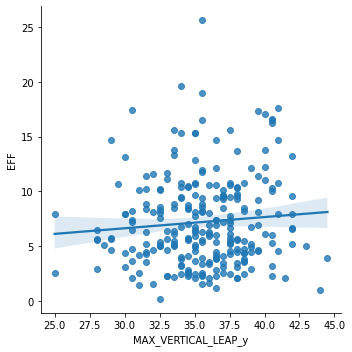

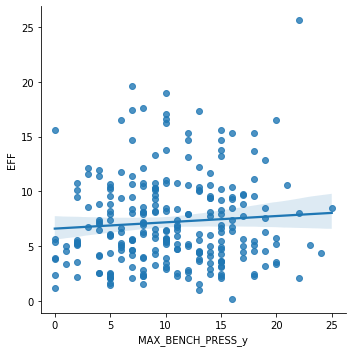

In [ ]:
for l in columns:
    print(l)
    sns.lmplot(x=l, y="EFF", data=df)

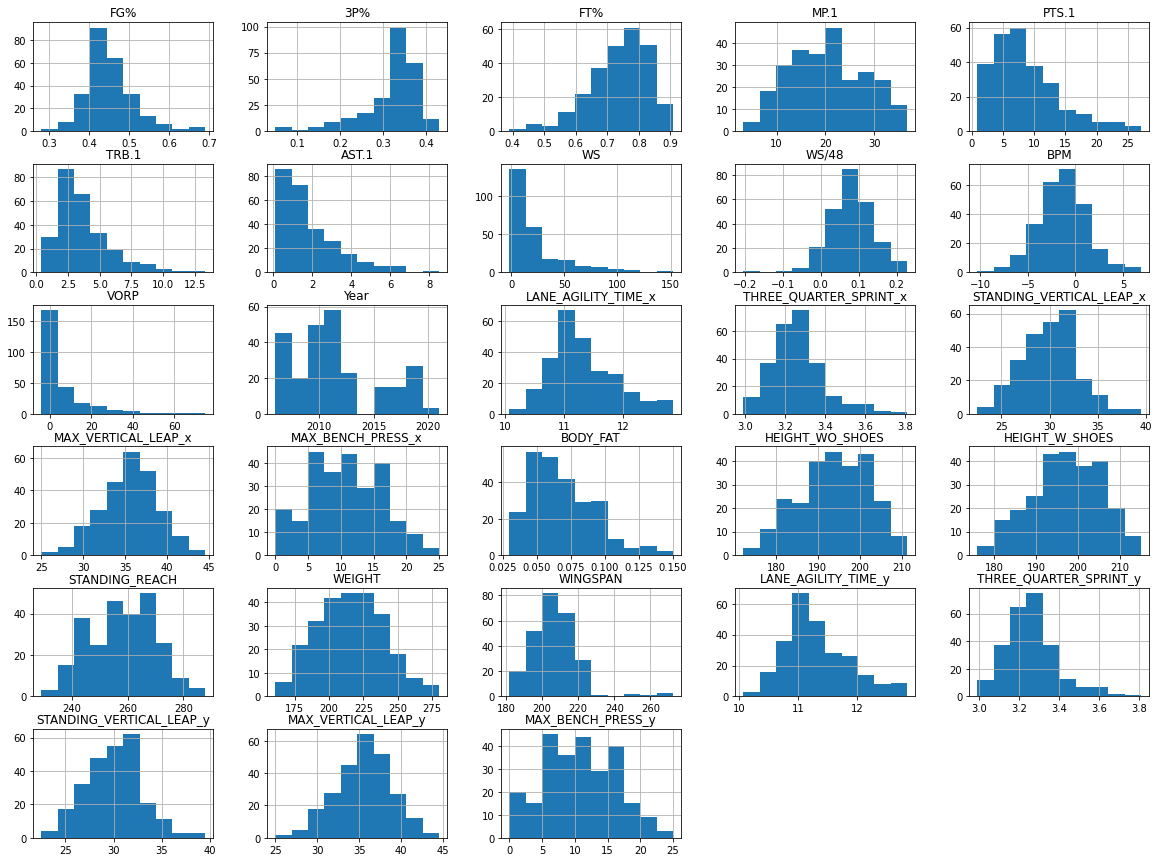

In [ ]:
df[columns].hist(figsize=(20,15));

# Supervised learning - Linear regression
We will first start off with training a model through splitting between a test and train dataset, then trying with cross validation. The columns we use will be those based of feature engineering and data exploration.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ZhiChua/NBA-prospect-prediction/main/final_data.csv')

## Initializing the model

In [ ]:
# Create a LinearRegression Object
lreg = LinearRegression()

# Data Columns
X_multi = df.drop(['PLAYER','EFF','Year'],1)

# Targets
Y_target = df['EFF']

# Fit the model
lreg.fit(X_multi,Y_target)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


LinearRegression()

## Using train test split

In [ ]:
# Training and validation

# Split the data into a train and test dataset
# Test multiple splits to see which model is the best

for i in [0.1,0.2,0.3,0.4]:
  X_train, X_test, Y_train, Y_test = train_test_split(X_multi,Y_target,test_size = i)

  # Do a linear regression only on the training dataset
  lreg.fit(X_train,Y_train)

  # Predictions on training and testing sets
  pred_train = lreg.predict(X_train)
  pred_test = lreg.predict(X_test)

  #print results
  print(f"For test size is {i}")
  print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
  print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  %np.mean((Y_train - pred_train) **2) )
  print(f"The mean absolute percentage error for the Y_train is "+ str( sklearn.metrics.mean_absolute_percentage_error(y_true = Y_train, y_pred = pred_train)))
  print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) **2) )
  print(f"The mean absolute percentage error for the Y_test is "+ str(sklearn.metrics.mean_absolute_percentage_error(y_true = Y_test, y_pred = pred_test)))
  print("")

For test size is 0.1
(230, 27) (26, 27) (230,) (26,)
Fit a model X_train, and calculate MSE with Y_train: 6.79
The mean absolute percentage error for the Y_train is 0.37051889552682715
Fit a model X_train, and calculate MSE with X_test and Y_test: 11.30
The mean absolute percentage error for the Y_test is 0.531672053341042

For test size is 0.2
(204, 27) (52, 27) (204,) (52,)
Fit a model X_train, and calculate MSE with Y_train: 7.12
The mean absolute percentage error for the Y_train is 0.3758397867359419
Fit a model X_train, and calculate MSE with X_test and Y_test: 8.11
The mean absolute percentage error for the Y_test is 0.6347726907027708

For test size is 0.3
(179, 27) (77, 27) (179,) (77,)
Fit a model X_train, and calculate MSE with Y_train: 6.57
The mean absolute percentage error for the Y_train is 0.38987504341264556
Fit a model X_train, and calculate MSE with X_test and Y_test: 9.81
The mean absolute percentage error for the Y_test is 0.3913533301134356

For test size is 0.4
(1

The results are very interesting. It looks like in general, the testing results are better than the training results which is starnge but means that we are not overfitting the data. This means that the models perform decently when given new data it has not seen before. Of the different test sizes, the best performing model is the one of size 0.2 with a mean absolute percentage error for the Y_test of 0.6347726907027708

The results for our run can be found here:

For test size is 0.1
(230, 27) (26, 27) (230,) (26,)
Fit a model X_train, and calculate MSE with Y_train: 6.79
The mean absolute percentage error for the Y_train is 0.37051889552682715
Fit a model X_train, and calculate MSE with X_test and Y_test: 11.30
The mean absolute percentage error for the Y_test is 0.531672053341042

For test size is 0.2
(204, 27) (52, 27) (204,) (52,)
Fit a model X_train, and calculate MSE with Y_train: 7.12
The mean absolute percentage error for the Y_train is 0.3758397867359419
Fit a model X_train, and calculate MSE with X_test and Y_test: 8.11
The mean absolute percentage error for the Y_test is 0.6347726907027708

For test size is 0.3
(179, 27) (77, 27) (179,) (77,)
Fit a model X_train, and calculate MSE with Y_train: 6.57
The mean absolute percentage error for the Y_train is 0.38987504341264556
Fit a model X_train, and calculate MSE with X_test and Y_test: 9.81
The mean absolute percentage error for the Y_test is 0.3913533301134356

For test size is 0.4
(153, 27) (103, 27) (153,) (103,)
Fit a model X_train, and calculate MSE with Y_train: 4.62
The mean absolute percentage error for the Y_train is 0.2856553085740994
Fit a model X_train, and calculate MSE with X_test and Y_test: 12.58
The mean absolute percentage error for the Y_test is 0.5393491446322638

## Using cross validation

Cross validation is a great method for for using all the data while still being able to accurately evaluate it. Since our dataset is small and we only have around 300 rows, this theoretically should be the best model as it takes in the most data for training. This method splits the data into Di pieces, and trains on all but the ith section and tests on the ith section. The process continues until all values of i have been tested on.

In [ ]:
#Cross validation to use all the data while still accurately evaluating
#Apply this process for 10 groups until 50 groups
for i in range(10,60,10):
  scores = cross_val_score(lreg,X_multi,Y_target,cv=i,scoring='explained_variance')
  print (f"For {i} sections:")
  print(scores)
  print(np.mean(scores))
  print("")

For 10 sections:
[ 0.19082954  0.46343864  0.59149664  0.60852439  0.43496805  0.60110264
 -0.0047716   0.40001891  0.57209118  0.47727495]
0.4334973346667554

For 20 sections:
[ 0.49643202  0.0364718   0.59672846  0.30659415  0.63517524  0.58211598
  0.79284949  0.51276556  0.46163351  0.11280735  0.65286776  0.65669214
 -0.25744012  0.29146317  0.53977146  0.40335304  0.39550139  0.7676291
 -0.15607826  0.77904668]
0.43031899655803524

For 30 sections:
[-5.03830837e-01 -3.24083299e-04  6.84444467e-01  8.39848170e-01
  3.94033319e-01  2.34409241e-01  5.73036438e-01  5.59865433e-01
  6.21060364e-01  8.64433438e-01  5.67501546e-01 -8.24250960e-01
  5.93132905e-01  3.51090162e-01  5.88874152e-02  5.37925376e-01
  4.11094079e-01  3.45268541e-01 -1.08278223e+00  1.16991134e-01
  4.06649047e-01  7.90094452e-01 -4.69589926e-02  4.29847099e-01
  4.79498171e-01 -9.13390197e-01  7.81221669e-01 -5.09649817e-01
  7.73920950e-01  8.02770730e-01]
0.27786123449003514

For 40 sections:
[ 0.02213188 -

### Findings  
The results show that the more pieces we split it in the lower the accuracy. This may be because the model is overfitting and is unable to react to unseen data.

## Finding coefficient estimates and tuning the model

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ZSChua/NBA-Stats/main/final_data.csv')

In [ ]:
# Set a DataFrame from the Features
coeff_df = pd.DataFrame(X_multi.columns)
coeff_df.columns = ['Features']

# Set a new column lining up the coefficients from the linear regression
coeff_df['Coefficient Estimate'] = pd.Series(lreg.coef_)

# Show
coeff_df.sort_values(by='Coefficient Estimate')

Features  Coefficient Estimate
1                        3P%             -2.388915
23    THREE_QUARTER_SPRINT_y             -0.419524
12    THREE_QUARTER_SPRINT_x             -0.419524
17           HEIGHT_WO_SHOES             -0.139305
9                        BPM             -0.054324
25       MAX_VERTICAL_LEAP_y             -0.036427
14       MAX_VERTICAL_LEAP_x             -0.036427
7                         WS             -0.032186
6                      AST.1             -0.028478
21                  WINGSPAN             -0.006941
20                    WEIGHT             -0.001674
10                      VORP             -0.000457
13  STANDING_VERTICAL_LEAP_x              0.012462
24  STANDING_VERTICAL_LEAP_y              0.012462
18            HEIGHT_W_SHOES              0.017413
3                       MP.1              0.035466
26         MAX_BENCH_PRESS_y              0.055810
15         MAX_BENCH_PRESS_x              0.055810
19            STANDING_REACH              0.073217
22       LANE_AGILITY_TIME_y              0.103407
11       LANE_AGILITY_TIME_x              0.103407
5                      TRB.1              0.235462
4                      PTS.1              0.549196
8                      WS/48              3.475395
16                  BODY_FAT              3.678979
2                        FT%              4.545767
0                        FG%              9.585836

### Findings:  
The results are very strange as previously, looking at the scatter plots, there was a strong correlation between MP (minutes played) and EFF however the coefficient estimate says this is not important. Lets try take all values above absolute 0.1 and see if this makes any difference.

In [ ]:
columns_to_drop = coeff_df.loc[(coeff_df['Coefficient Estimate'] < 0.1) & (coeff_df['Coefficient Estimate'] > -0.1)]
columns_to_drop = columns_to_drop['Features']
columns_to_drop

3                         MP.1
6                        AST.1
7                           WS
9                          BPM
10                        VORP
13    STANDING_VERTICAL_LEAP_x
14         MAX_VERTICAL_LEAP_x
15           MAX_BENCH_PRESS_x
18              HEIGHT_W_SHOES
19              STANDING_REACH
20                      WEIGHT
21                    WINGSPAN
24    STANDING_VERTICAL_LEAP_y
25         MAX_VERTICAL_LEAP_y
26           MAX_BENCH_PRESS_y
Name: Features, dtype: object

In [ ]:
# Data Columns
X_multi = df.drop(['PLAYER','EFF','Year', 'BPM', 'MAX_VERTICAL_LEAP_y', 'MP.1', 'AST.1','WS','BPM','VORP','STANDING_VERTICAL_LEAP_x','MAX_VERTICAL_LEAP_x',
                   'MAX_BENCH_PRESS_x', 'HEIGHT_W_SHOES', 'STANDING_REACH', 'WEIGHT', 'WINGSPAN', 'STANDING_VERTICAL_LEAP_y', 'MAX_VERTICAL_LEAP_y', 'MAX_BENCH_PRESS_y'],1)

# Targets
Y_target = df['EFF']

# Fit the model
lreg.fit(X_multi,Y_target)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


LinearRegression()

In [ ]:
X_multi

FG%       3P%    FT%  PTS.1  TRB.1  WS/48  LANE_AGILITY_TIME_x  \
0    0.470  0.317657  0.505    4.9    4.8  0.053                11.96   
1    0.509  0.317657  0.562    3.4    3.7  0.077                12.07   
2    0.450  0.317657  0.557    3.6    2.6  0.014                11.26   
3    0.485  0.317657  0.739    2.0    1.0  0.057                12.78   
4    0.446  0.317657  0.667    3.2    1.6  0.032                11.21   
..     ...       ...    ...    ...    ...    ...                  ...   
251  0.529  0.317657  0.455    0.9    1.0  0.096                12.06   
252  0.513  0.317657  0.557    4.2    4.3  0.119                12.35   
253  0.507  0.317657  0.652    4.6    3.6  0.101                12.74   
254  0.564  0.317657  0.550    1.8    1.1  0.178                11.76   
255  0.689  0.317657  0.655    7.2    4.3  0.191                11.61   

     THREE_QUARTER_SPRINT_x  BODY_FAT  HEIGHT_WO_SHOES  LANE_AGILITY_TIME_y  \
0                      3.17      0.05           199.69                11.96   
1                      3.70      0.11           210.00                12.07   
2                      3.29      0.13           202.86                11.26   
3                      3.61      0.13           200.96                12.78   
4                      3.14      0.08           202.86                11.21   
..                      ...       ...              ...                  ...   
251                    3.20      0.10           202.86                12.06   
252                    3.29      0.06           204.77                12.35   
253                    3.45      0.12           199.69                12.74   
254                    3.62      0.15           207.94                11.76   
255                    3.25      0.06           203.50                11.61   

     THREE_QUARTER_SPRINT_y  
0                      3.17  
1                      3.70  
2                      3.29  
3                      3.61  
4                      3.14  
..                      ...  
251                    3.20  
252                    3.29  
253                    3.45  
254                    3.62  
255                    3.25  

[256 rows x 12 columns]

## Trying again with less features based on coefficient estimates: Train test split


In [ ]:
# Training and validation

# Split the data into a train and test dataset
# Test multiple splits to see which model is the best

for i in [0.1,0.2,0.3,0.4]:
  X_train, X_test, Y_train, Y_test = train_test_split(X_multi,Y_target,test_size = i)

  # Do a linear regression only on the training dataset
  lreg.fit(X_train,Y_train)

  # Predictions on training and testing sets
  pred_train = lreg.predict(X_train)
  pred_test = lreg.predict(X_test)

  #print results
  print(f"For test size is {i}")
  print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
  print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  %np.mean((Y_train - pred_train) **2) )
  print(f"The mean absolute percentage error for the Y_train is "+ str( sklearn.metrics.mean_absolute_percentage_error(y_true = Y_train, y_pred = pred_train)))
  print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) **2) )
  print(f"The mean absolute percentage error for the Y_test is "+ str(sklearn.metrics.mean_absolute_percentage_error(y_true = Y_test, y_pred = pred_test)))
  print("")

For test size is 0.1
(230, 12) (26, 12) (230,) (26,)
Fit a model X_train, and calculate MSE with Y_train: 7.02
The mean absolute percentage error for the Y_train is 0.42725746554843574
Fit a model X_train, and calculate MSE with X_test and Y_test: 16.92
The mean absolute percentage error for the Y_test is 0.47815376649511065

For test size is 0.2
(204, 12) (52, 12) (204,) (52,)
Fit a model X_train, and calculate MSE with Y_train: 7.42
The mean absolute percentage error for the Y_train is 0.3797751571366558
Fit a model X_train, and calculate MSE with X_test and Y_test: 10.42
The mean absolute percentage error for the Y_test is 0.8845218973012936

For test size is 0.3
(179, 12) (77, 12) (179,) (77,)
Fit a model X_train, and calculate MSE with Y_train: 8.08
The mean absolute percentage error for the Y_train is 0.44636278112064653
Fit a model X_train, and calculate MSE with X_test and Y_test: 7.42
The mean absolute percentage error for the Y_test is 0.3818969743162004

For test size is 0.4

### Results:  
  
Our model is looking quite amazing with this change using a test size of 0.2. We are not sure why the results vary so much however it is clear that the more data we train with the higher the test accuracy.

For test size is 0.1
(230, 12) (26, 12) (230,) (26,)
Fit a model X_train, and calculate MSE with Y_train: 7.02
The mean absolute percentage error for the Y_train is 0.42725746554843574
Fit a model X_train, and calculate MSE with X_test and Y_test: 16.92
The mean absolute percentage error for the Y_test is 0.47815376649511065

For test size is 0.2
(204, 12) (52, 12) (204,) (52,)
Fit a model X_train, and calculate MSE with Y_train: 7.42
The mean absolute percentage error for the Y_train is 0.3797751571366558
Fit a model X_train, and calculate MSE with X_test and Y_test: 10.42
The mean absolute percentage error for the Y_test is 0.8845218973012936

For test size is 0.3
(179, 12) (77, 12) (179,) (77,)
Fit a model X_train, and calculate MSE with Y_train: 8.08
The mean absolute percentage error for the Y_train is 0.44636278112064653
Fit a model X_train, and calculate MSE with X_test and Y_test: 7.42
The mean absolute percentage error for the Y_test is 0.3818969743162004

For test size is 0.4
(153, 12) (103, 12) (153,) (103,)
Fit a model X_train, and calculate MSE with Y_train: 7.74
The mean absolute percentage error for the Y_train is 0.41622652138202
Fit a model X_train, and calculate MSE with X_test and Y_test: 8.59
The mean absolute percentage error for the Y_test is 0.39504128737575794

## Trying again with less features based on coefficient estimates: Cross Validation

In [ ]:
#Cross validation to use all the data while still accurately evaluating
#Apply this process for 10 groups until 50 groups
for i in range(10,60,10):
  scores = cross_val_score(lreg,X_multi,Y_target,cv=i,scoring='explained_variance')
  print (f"For {i} sections:")
  print(scores)
  print(np.mean(scores))
  print("")

For 10 sections:
[0.07553649 0.42559667 0.54568394 0.62199682 0.3809221  0.5898898
 0.204581   0.42614632 0.63705043 0.59037365]
0.44977772115884596

For 20 sections:
[ 0.5724714  -0.26542987  0.49311292  0.31787804  0.58940389  0.49198979
  0.82104005  0.48629272  0.39495081  0.28002713  0.71312297  0.57338566
 -0.17998407  0.48447775  0.53579069  0.42857462  0.45735059  0.84205859
  0.08540908  0.8389762 ]
0.4480449479874495

For 30 sections:
[ 0.24349863 -0.30679979  0.69592988  0.66143883  0.51862849  0.17390986
  0.55803478  0.4574377   0.6453464   0.89682263  0.57794711 -0.81714688
  0.52207961  0.51783048 -0.0280689   0.60211715  0.43239284  0.32185162
 -0.69970455  0.27428031  0.54998813  0.67237474 -0.13917954  0.51157736
  0.46969249 -0.33582739  0.88660305 -0.21571113  0.83201115  0.79991614]
0.34264237360640404

For 40 sections:
[ 0.46660884 -0.77336296  0.40634037  0.67585339  0.64974809  0.46948466
  0.42027298  0.21113216  0.53107818  0.20100332  0.73658686  0.53632929
 

### Results:  
  
Oddly, the more pieces of data we split the less accurate we get. This is likely due to overfitting.


## Final model:  
We will proceed with a train test split or around 20% test. Multiple runs of the models give different results however a test size of 0.2 consistently gives higher than the average and is generally between 50-80%. If we were to save a model, we would run it until we achieved an 80% model as seen below.

For test size 0.2
(204, 12) (52, 12) (204,) (52,)
Fit a model X_train, and calculate MSE with Y_train: 8.29
The mean absolute percentage error for the Y_train is 0.38409739548316385
Fit a model X_train, and calculate MSE with X_test and Y_test: 6.60
The mean absolute percentage error for the Y_test is 0.8264347254500237

In [ ]:
# Training and validation

# Split the data into a train and test dataset
# Test multiple splits to see which model is the best

X_train, X_test, Y_train, Y_test = train_test_split(X_multi,Y_target,test_size = 0.2)

# Do a linear regression only on the training dataset
lreg.fit(X_train,Y_train)

# Predictions on training and testing sets
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

#print results
print(f"For test size 0.2")
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  %np.mean((Y_train - pred_train) **2) )
print(f"The mean absolute percentage error for the Y_train is "+ str( sklearn.metrics.mean_absolute_percentage_error(y_true = Y_train, y_pred = pred_train)))
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) **2) )
print(f"The mean absolute percentage error for the Y_test is "+ str(sklearn.metrics.mean_absolute_percentage_error(y_true = Y_test, y_pred = pred_test)))
print("")

For test size 0.2
(204, 12) (52, 12) (204,) (52,)
Fit a model X_train, and calculate MSE with Y_train: 8.29
The mean absolute percentage error for the Y_train is 0.38409739548316385
Fit a model X_train, and calculate MSE with X_test and Y_test: 6.60
The mean absolute percentage error for the Y_test is 0.8264347254500237



# Unsupervsied Learning

## Preperation of Data

Scale the data for unsupervised learning. Drop the target column and get rids of the row indicators like Player and Year. Rename the index to the player's name so that we can easily reference which player is in which cluster.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ZSChua/NBA-Stats/main/final_data.csv')

In [ ]:
u_df = df.rename(index=df['PLAYER'])
u_df = u_df.drop(columns = {'EFF', 'PLAYER', 'Year'})

from sklearn.preprocessing import scale

scale(u_df)

u_df

FG%       3P%    FT%  MP.1  PTS.1  TRB.1  AST.1   WS  \
Thomas Robinson   0.470  0.317657  0.505  13.4    4.9    4.8    0.6  4.6   
Aaron Gray        0.509  0.317657  0.562  12.1    3.4    3.7    0.7  6.2   
Jeremy Tyler      0.450  0.317657  0.557   9.9    3.6    2.6    0.2  0.3   
Derrick Caracter  0.485  0.317657  0.739   5.2    2.0    1.0    0.2  0.3   
JaJuan Johnson    0.446  0.317657  0.667   8.3    3.2    1.6    0.2  0.2   
...                 ...       ...    ...   ...    ...    ...    ...  ...   
Sasha Kaun        0.529  0.317657  0.455   3.8    0.9    1.0    0.1  0.2   
Festus Ezeli      0.513  0.317657  0.557  14.1    4.2    4.3    0.4  5.9   
Jordan Williams   0.507  0.317657  0.652  14.8    4.6    3.6    0.3  1.3   
Dakari Johnson    0.564  0.317657  0.550   5.2    1.8    1.1    0.3  0.6   
Daniel Gafford    0.689  0.317657  0.655  16.6    7.2    4.3    0.7  9.8   

                  WS/48  BPM  ...  HEIGHT_WO_SHOES  HEIGHT_W_SHOES  \
Thomas Robinson   0.053 -3.5  ...           199.69          202.23   
Aaron Gray        0.077 -3.6  ...           210.00          214.45   
Jeremy Tyler      0.014 -7.0  ...           202.86          206.67   
Derrick Caracter  0.057 -7.1  ...           200.96          204.13   
JaJuan Johnson    0.032 -3.9  ...           202.86          205.40   
...                 ...  ...  ...              ...             ...   
Sasha Kaun        0.096 -2.8  ...           202.86          207.31   
Festus Ezeli      0.119 -2.0  ...           204.77          209.21   
Jordan Williams   0.101 -2.1  ...           199.69          202.86   
Dakari Johnson    0.178 -0.3  ...           207.94          209.85   
Daniel Gafford    0.191  1.2  ...           203.50          206.67   

                  STANDING_REACH  WEIGHT  WINGSPAN  LANE_AGILITY_TIME_y  \
Thomas Robinson           265.40   244.2    218.26                11.96   
Aaron Gray                271.27   271.0    218.26                12.07   
Jeremy Tyler              276.35   262.4    222.70                11.26   
Derrick Caracter          269.21   280.0    210.64                12.78   
JaJuan Johnson            269.21   219.8    215.08                11.21   
...                          ...     ...       ...                  ...   
Sasha Kaun                275.08   247.0    220.16                12.06   
Festus Ezeli              270.00   264.2    224.61                12.35   
Jordan Williams           266.67   247.2    210.64                12.74   
Dakari Johnson            280.16   264.6    215.08                11.76   
Daniel Gafford            275.08   237.6    215.72                11.61   

                  THREE_QUARTER_SPRINT_y  STANDING_VERTICAL_LEAP_y  \
Thomas Robinson                     3.17                      28.5   
Aaron Gray                          3.70                      27.0   
Jeremy Tyler                        3.29                      28.0   
Derrick Caracter                    3.61                      25.0   
JaJuan Johnson                      3.14                      33.5   
...                                  ...                       ...   
Sasha Kaun                          3.20                      29.0   
Festus Ezeli                        3.29                      34.0   
Jordan Williams                     3.45                      25.0   
Dakari Johnson                      3.62                      22.5   
Daniel Gafford                      3.25                      32.5   

                  MAX_VERTICAL_LEAP_y  MAX_BENCH_PRESS_y  
Thomas Robinson                  35.5                 15  
Aaron Gray                       32.5                 17  
Jeremy Tyler                     33.5                 10  
Derrick Caracter                 30.5                 22  
JaJuan Johnson                   38.0                 15  
...                               ...                ...  
Sasha Kaun                       32.0                 13  
Festus Ezeli                     33.5               

## Optimal Number of Clusters

Use the elbow method to determine how many clusters should be used.

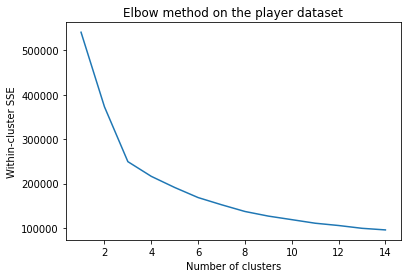

In [ ]:
#Elbow method
distortations = {}
for k in range(1,15):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(u_df)
  distortations[k] = kmeans.inertia_

plt.plot(list(distortations.keys()),list(distortations.values()))
plt.title('Elbow method on the player dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster SSE')
plt.show()

Locat the elbow of the modoel

In [ ]:
!pip install kneed
from kneed import KneeLocator

kl = KneeLocator(
    list(distortations.keys()),
    list(distortations.values()),
    curve='convex',
    direction='decreasing'
)

kl.elbow

3

## Running the Model

In [ ]:
clustering  = KMeans(n_clusters=kl.elbow,random_state=5)
clustering.fit(u_df)

KMeans(n_clusters=3, random_state=5)

## Plotting the Model

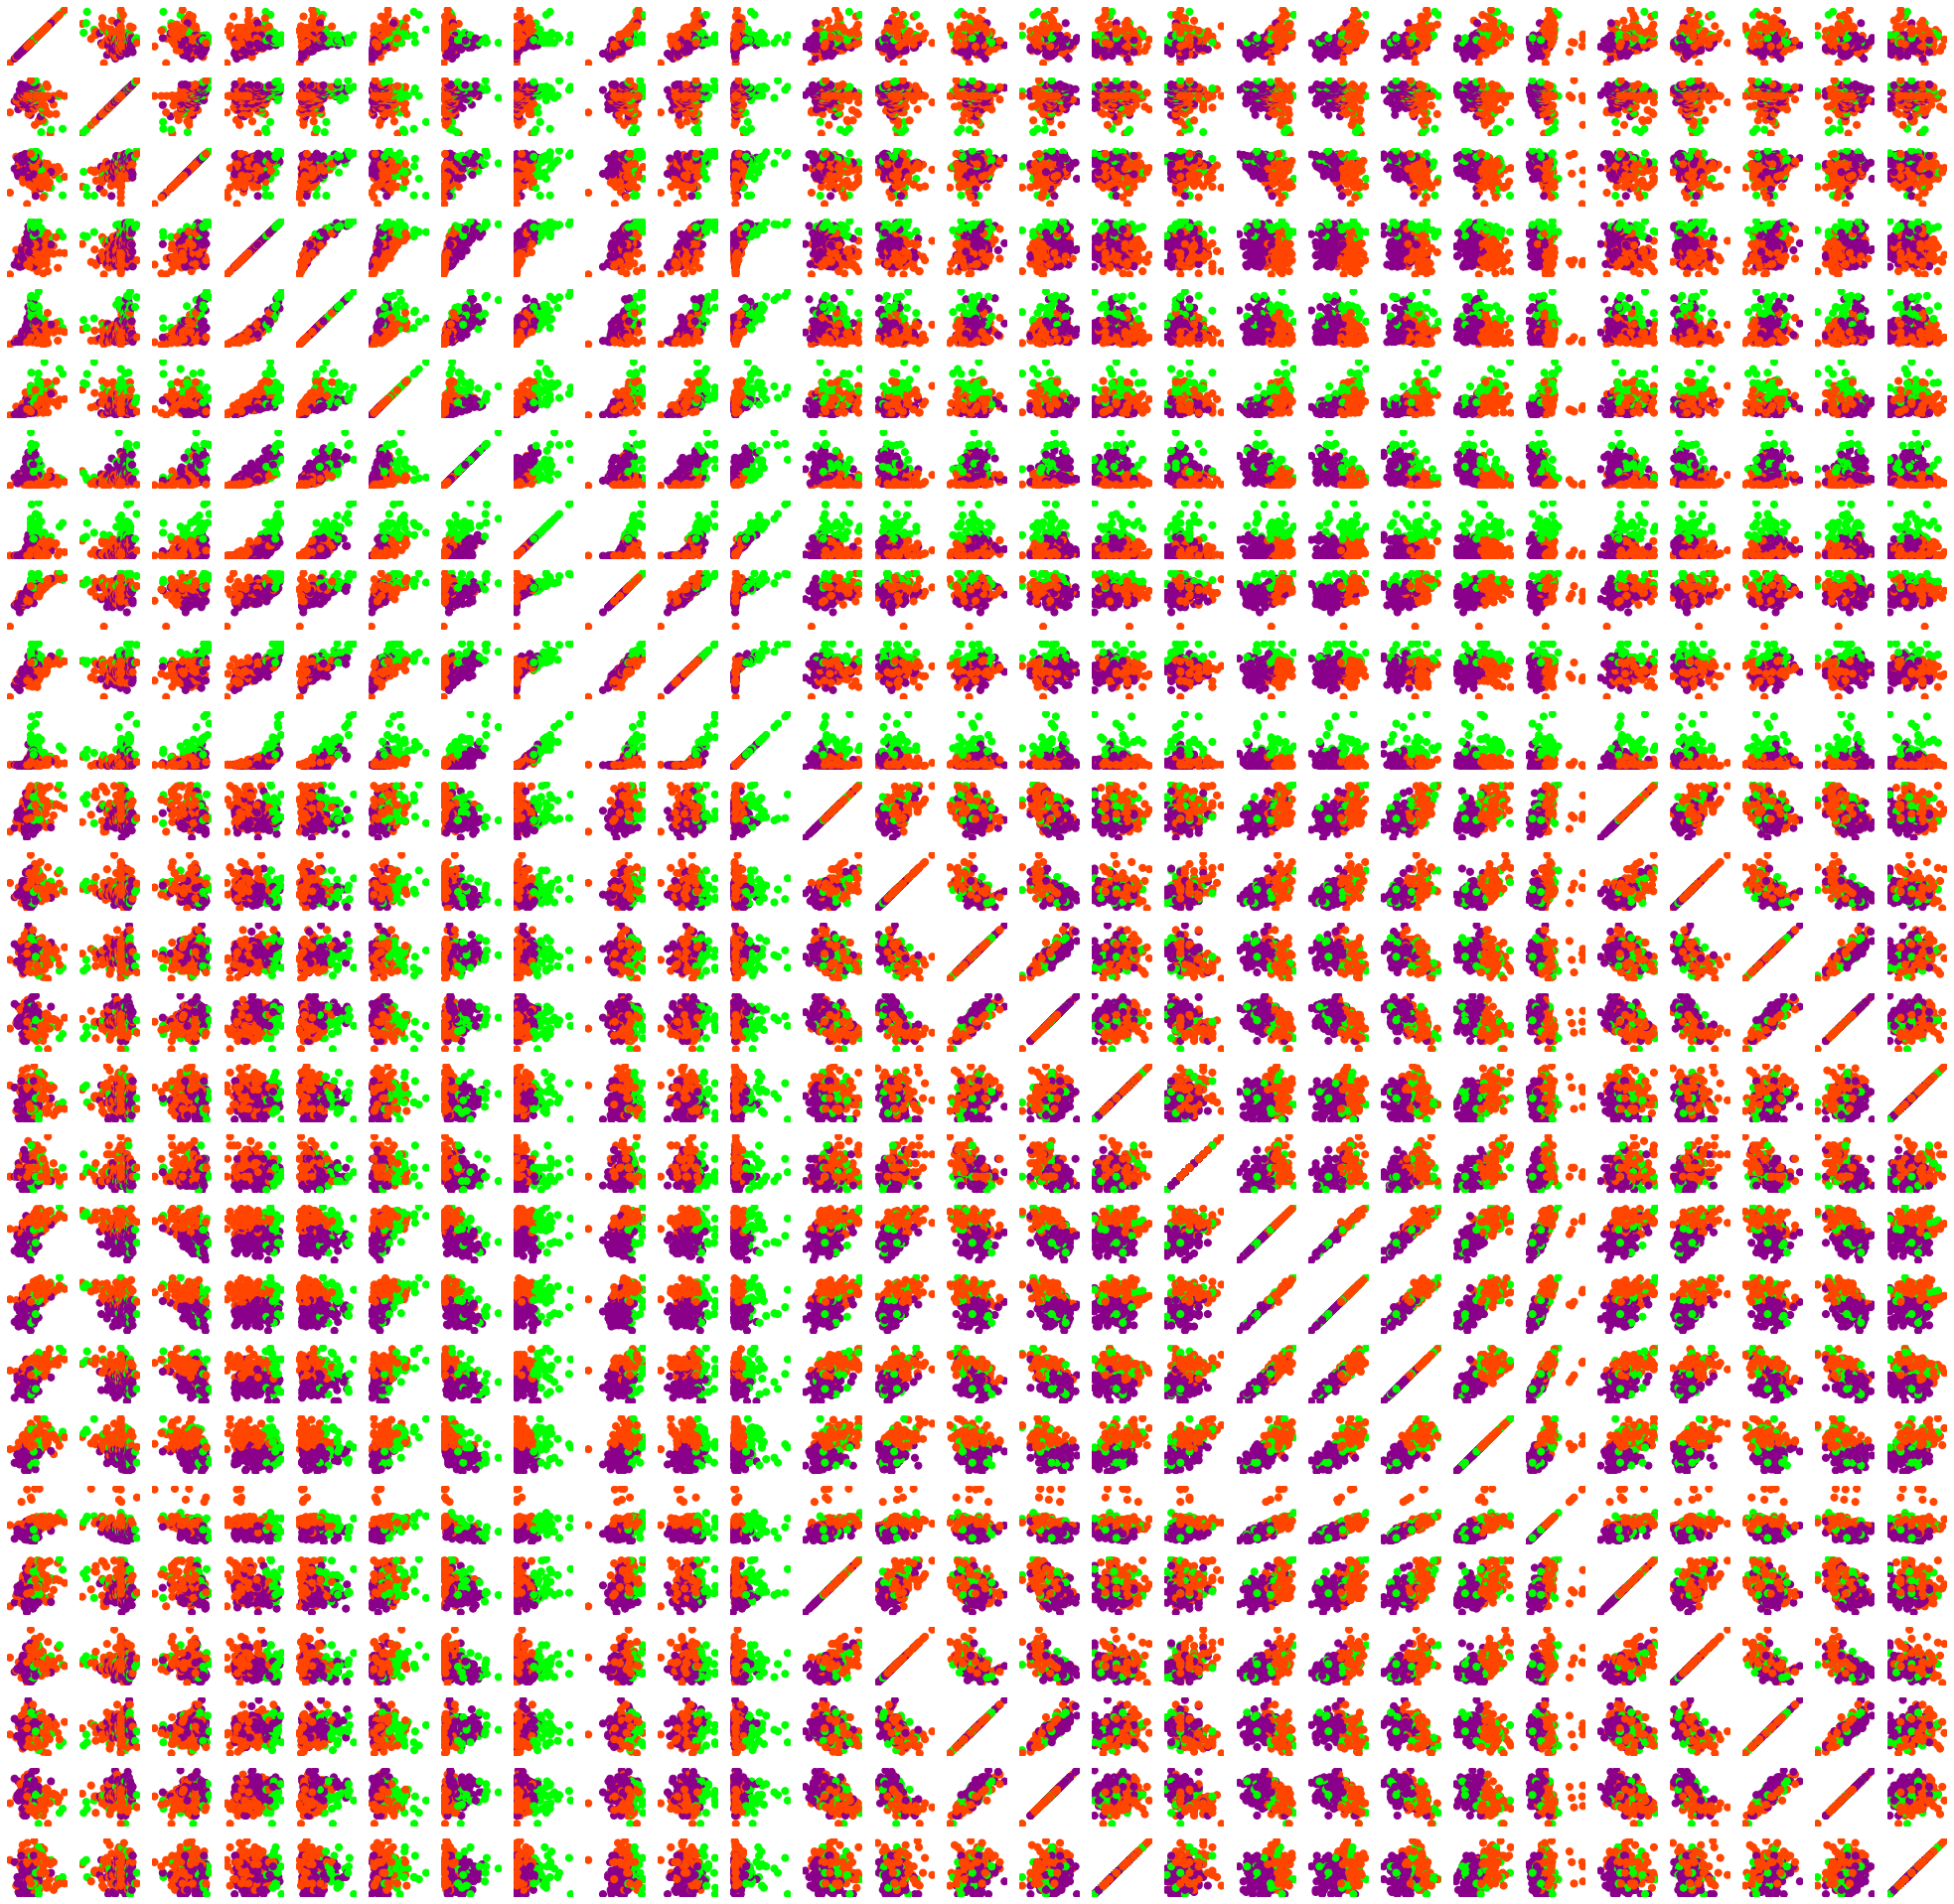

In [ ]:
from matplotlib.gridspec import *

color_theme = np.array(['darkmagenta','lime','orangered'])

index = 1

fig, axes = plt.subplots(nrows=27, ncols=27, figsize=(35, 35))
grid = GridSpec(27, 27)


for c in u_df.columns:
  for d in u_df.columns:
    plt.subplot(27,27,index)
    plt.scatter(x=u_df[d],y=u_df[c],c=color_theme[clustering.labels_],s=50)
    plt.axis('off')
    index = index + 1

Next, certain plots were chosen for their distinctiveness and the information they could provide.

<function matplotlib.pyplot.show>

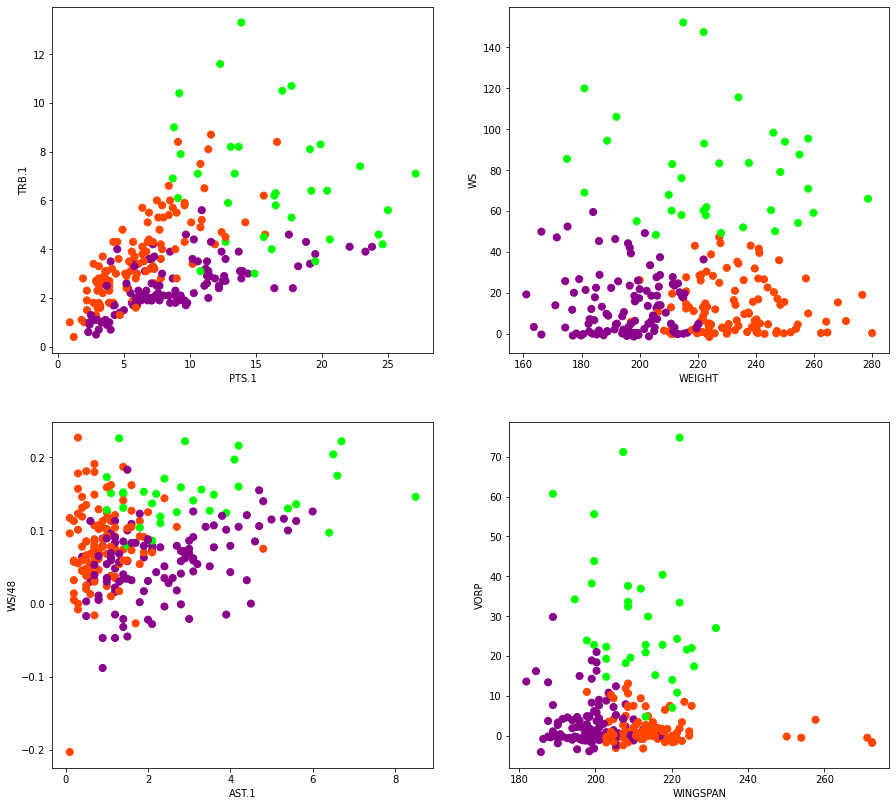

In [ ]:
fig, axes = fig, axs = plt.subplots(2, 2, figsize=(15, 14))

grid = GridSpec(2, 2)

# plt.subplot(2, 2,1)
# plt.xlabel = 'PTS.1'
# plt.ylabel = 'TRB.1'
axes[0,0].scatter(x=u_df['PTS.1'],y=u_df['TRB.1'],c=color_theme[clustering.labels_],s=50)
axes[0,0].set(xlabel = 'PTS.1', ylabel = 'TRB.1')


axes[0,1].scatter(x=u_df['WEIGHT'],y=u_df['WS'],c=color_theme[clustering.labels_],s=50)
axes[0,1].set(xlabel = 'WEIGHT', ylabel = 'WS')


axes[1,0].scatter(x=u_df['AST.1'],y=u_df['WS/48'],c=color_theme[clustering.labels_],s=50)
axes[1,0].set(xlabel = 'AST.1', ylabel = 'WS/48')


axes[1, 1].scatter(x=u_df['WINGSPAN'],y=u_df['VORP'],c=color_theme[clustering.labels_],s=50)
axes[1,1].set(xlabel = 'WINGSPAN', ylabel = 'VORP')

plt.show


## Dendrogram

This hierarchical model below allows us to visualize what player is in what cluster and if there are any commonalities among the clusters

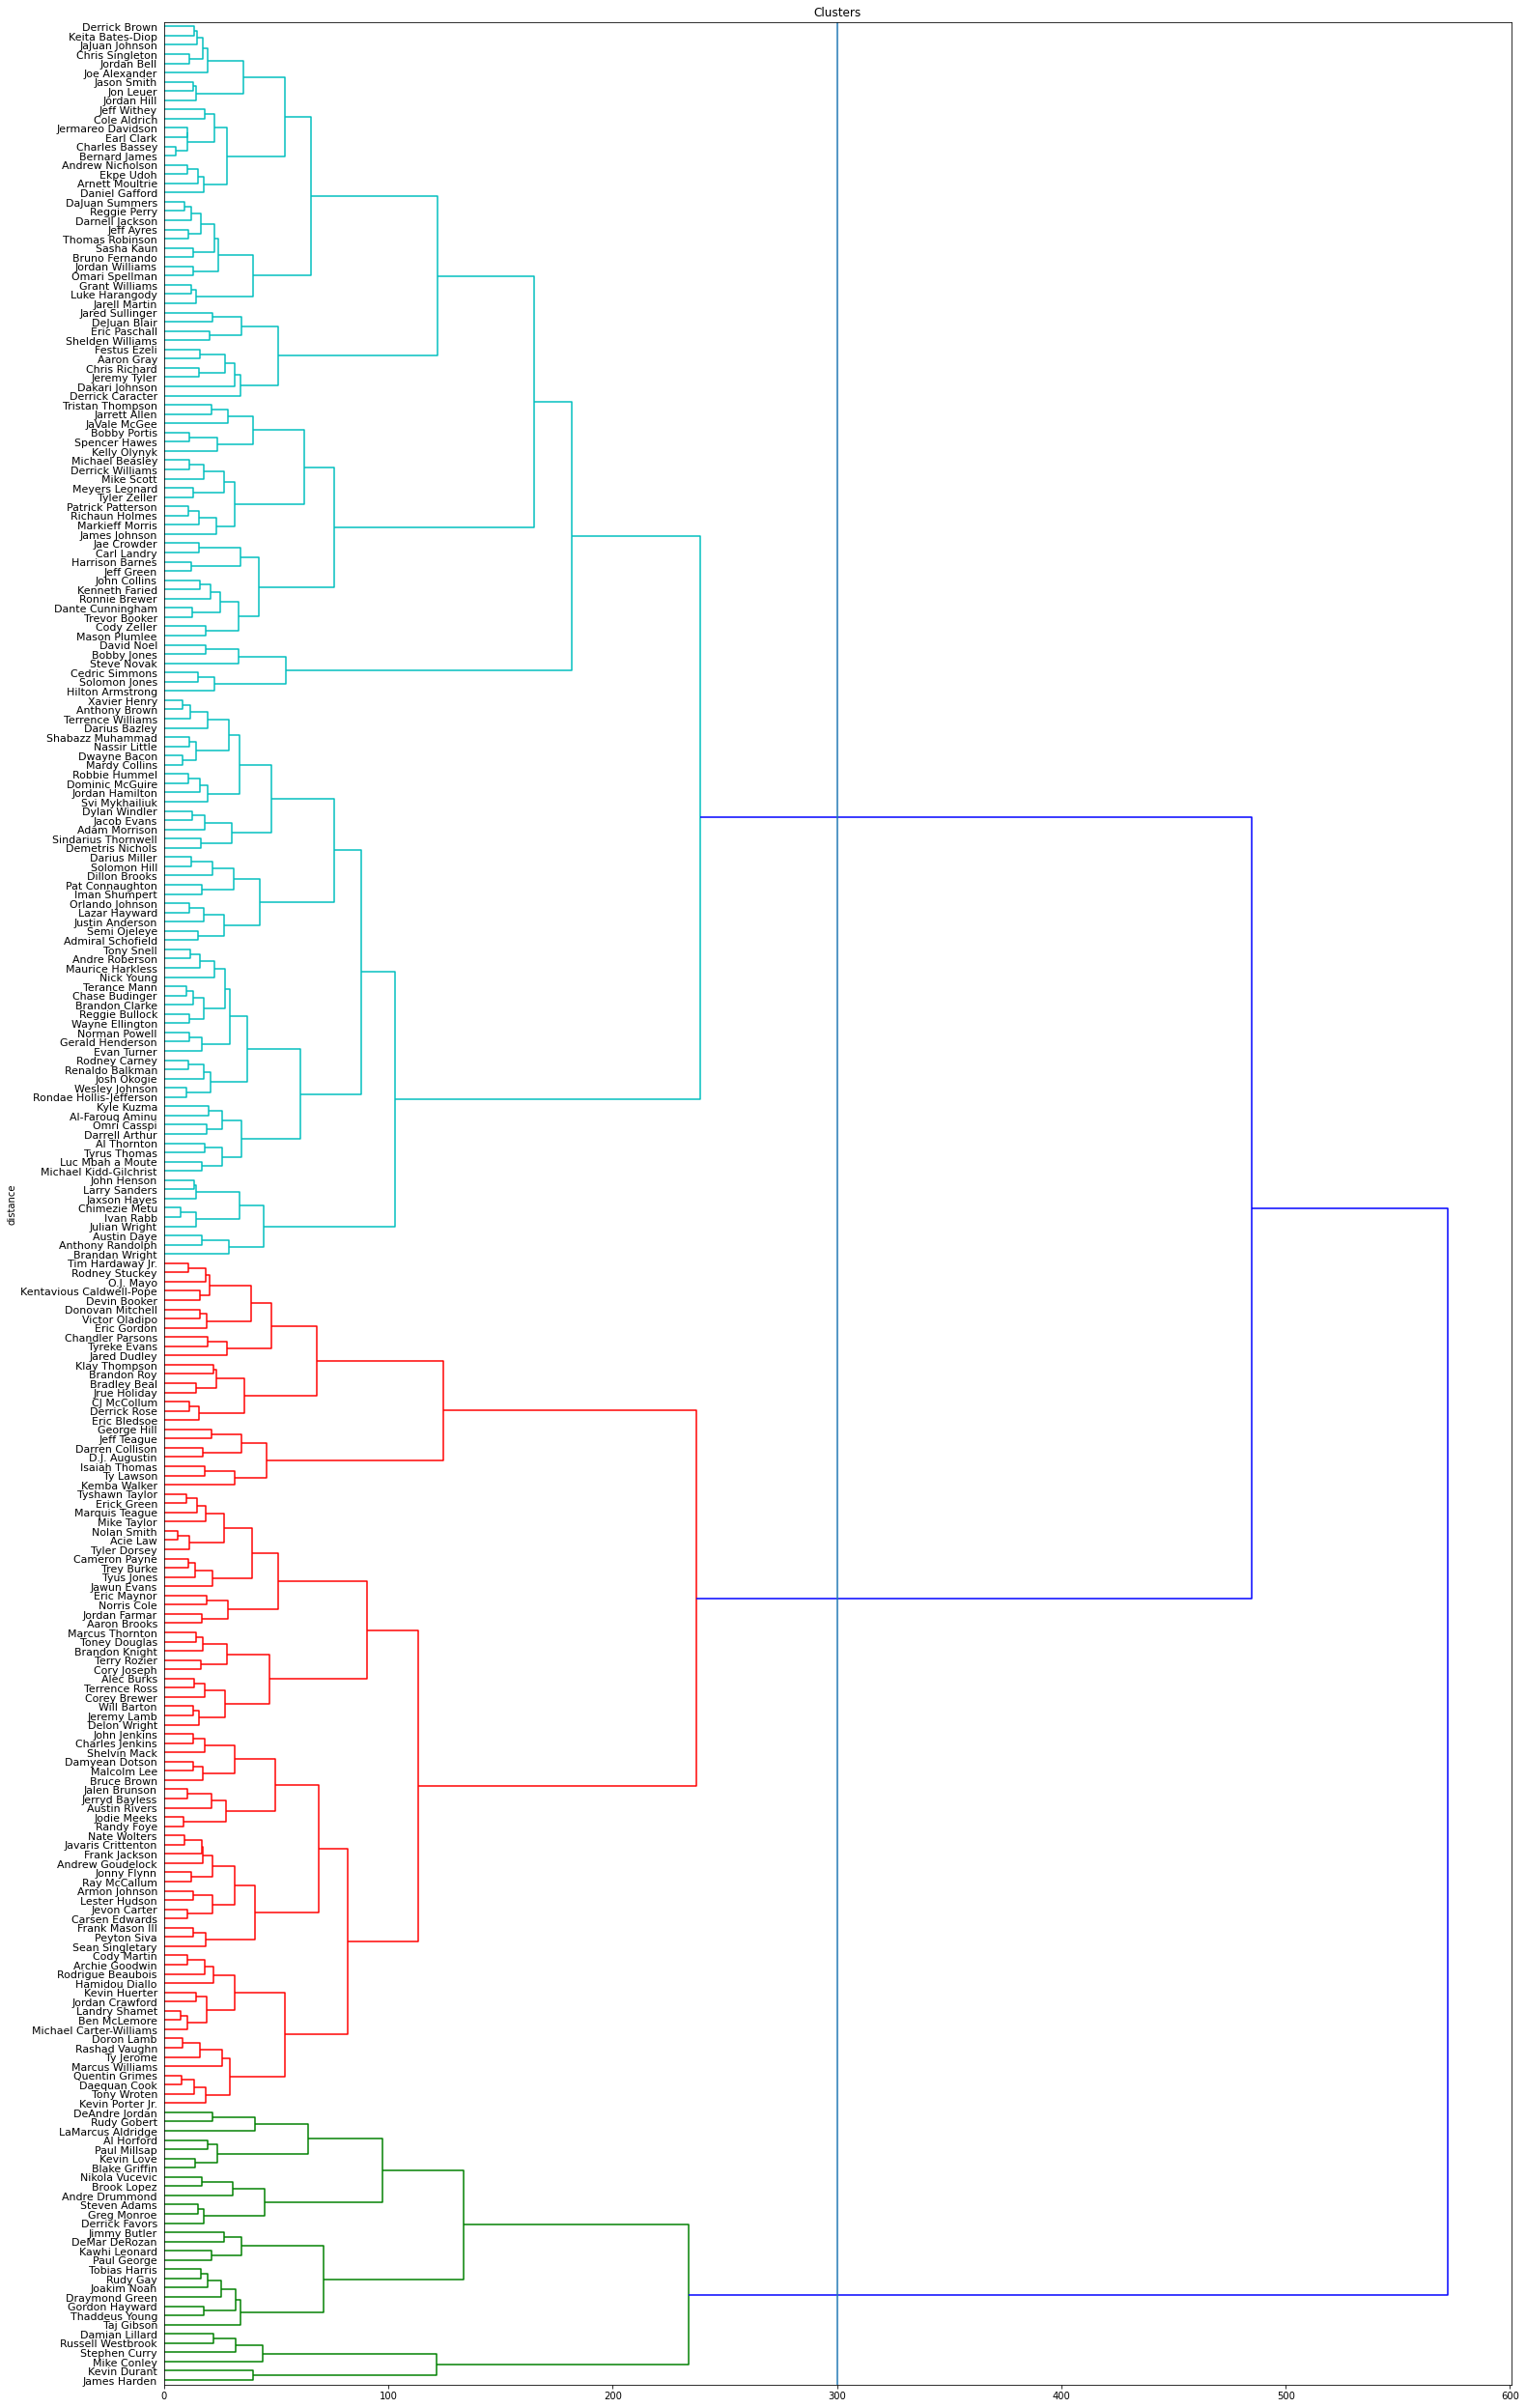

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(u_df,'ward')

plt.figure(figsize=(25,45))
plt.title('Clusters')
plt.ylabel('distance')
dendrogram(Z, orientation = 'right', labels=u_df.index, leaf_font_size= 11)

plt.axvline(x=300)
plt.show()

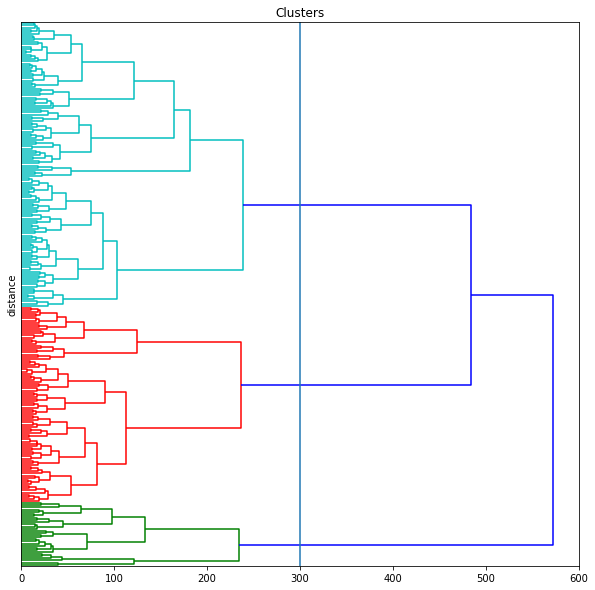

In [ ]:
Z = linkage(u_df,'ward')

plt.figure(figsize=(10,10))
plt.title('Clusters')
plt.ylabel('distance')
dendrogram(Z, orientation = 'right', no_labels=True)

plt.axvline(x=300)
plt.show()